# EigenValues and Principle Component Analysis 

## The Eigenvalue Equation
The eigenvalue equation is a matrix equation of the form
\begin{equation}  
A \mathbf{v} = \lambda \mathbf{v}, 
\end{equation} 
where $A$ is a square matrix, $\mathbf{v}$ is a non-zero vector called the eigenvector, and $\lambda$ is the eigenvalue. Geometrically, when a matrix $A$ acts on its eigenvector $\mathbf{v}$, the direction of the vector remains unchanged—only its magnitude is scaled by the eigenvalue $\lambda$.

Here is an example of using NumPy to find the eigenvalues and eigenvectors of a matrix:
\begin{equation} 
A = \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}.
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a 2x2 matrix
A = np.array([[3, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors (columns):\n{eigenvectors}")

# Verify the eigenvalue equation for each pair
for i in range(len(eigenvalues)):
    λ = eigenvalues[i]
    v = eigenvectors[:, i]  # Note: column i
    
    print(f"\nFor λ_{i+1} = {λ:.3f}:")
    print(f"Eigenvector v_{i+1} = {v}")
    print(f"A @ v_{i+1} = {A @ v}")
    print(f"λ_{i+1} * v_{i+1} = {λ * v}")
    print(f"Equal? {np.allclose(A @ v, λ * v)}")

Matrix A:
[[3 1]
 [1 3]]

Eigenvalues: [4. 2.]
Eigenvectors (columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

For λ_1 = 4.000:
Eigenvector v_1 = [0.70710678 0.70710678]
A @ v_1 = [2.82842712 2.82842712]
λ_1 * v_1 = [2.82842712 2.82842712]
Equal? True

For λ_2 = 2.000:
Eigenvector v_2 = [-0.70710678  0.70710678]
A @ v_2 = [-1.41421356  1.41421356]
λ_2 * v_2 = [-1.41421356  1.41421356]
Equal? True


The eigenvalues and eigenvectors returned by `np.linalg.eig()` are not sorted in any particular order.
However, the correspondence between eigenvalues and eigenvectors is maintained: `eigenvalues[i]` corresponds to `eigenvectors[:, i]`. Note that the eigenvectors are separated by the column, the second axis. 

Here is another example: 
\begin{equation} 
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}, 
\end{equation} 
with a NumPy code below.

In [3]:
# Define a matrix
A = np.array([[4, 2],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors (columns):\n{eigenvectors}")

# Verify the eigenvalue equation for each pair
for i in range(len(eigenvalues)):
    λ = eigenvalues[i]
    v = eigenvectors[:, i]  # Note: column i
    
    print(f"\nFor λ_{i+1} = {λ:.3f}:")
    print(f"Eigenvector v_{i+1} = {v}")
    print(f"A @ v_{i+1} = {A @ v}")
    print(f"λ_{i+1} * v_{i+1} = {λ * v}")
    print(f"Equal? {np.allclose(A @ v, λ * v)}")

Matrix A:
[[4 2]
 [1 3]]

Eigenvalues: [5. 2.]
Eigenvectors (columns):
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

For λ_1 = 5.000:
Eigenvector v_1 = [0.89442719 0.4472136 ]
A @ v_1 = [4.47213595 2.23606798]
λ_1 * v_1 = [4.47213595 2.23606798]
Equal? True

For λ_2 = 2.000:
Eigenvector v_2 = [-0.70710678  0.70710678]
A @ v_2 = [-1.41421356  1.41421356]
λ_2 * v_2 = [-1.41421356  1.41421356]
Equal? True


### Properties of Eigenvalues

For an $n \times n$ matrix, there are several important properties:

1. A matrix has exactly $n$ eigenvalues (counting multiplicities)
2. The trace of a the matrix is the sum of the eigenvalues, $\text{tr}(A) = \sum_{i=1}^n \lambda_i$
3. The determinant is the product of the eigenvalues $\det(A) = \prod_{i=1}^n \lambda_i$
4. If $A$ has $n$ linearly independent eigenvectors, then $A$ can be diagonalized as $A = QDQ^{-1}$, where $D$ is a diagonal matrix with eigenvalues on the diagonal and $Q$ is the matrix of corresponding eigenvectors

The characteristic polynomial of a matrix $A$ is given by $\det(A - \lambda I) = 0$, where $I$ is the identity matrix.

**Example**
We can use NumPy to verify properties 1 through 4 above, for the following matrix. 

\begin{equation} 
A= \begin{bmatrix}
6 & 2 & 1 \\
2 & 3 & 1 \\
1 & 1 & 2
\end{bmatrix}
\end{equation} 

In [4]:
# Define a 3x3 matrix for testing
A = np.array([
    [6, 2, 1],
    [2, 3, 1],
    [1, 1, 2]
], dtype=float)

print("Matrix A:")

Matrix A:


In [5]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"Eigenvalues: {eigenvalues}")

# Trace equals sum of eigenvalues
print("Trace equals sum of eigenvalues")

trace_A = np.trace(A)
sum_eigenvalues = np.sum(eigenvalues)
print(f"Trace of A, via np.trace( ): {trace_A}")
print(f"Sum of eigenvalues: {sum_eigenvalues}")

Eigenvalues: [7.33949226 2.29511673 1.36539102]
Trace equals sum of eigenvalues
Trace of A, via np.trace( ): 11.0
Sum of eigenvalues: 11.000000000000004


In [6]:
# Determinant equals product of eigenvalues
print("Determinant equals product of eigenvalues")
det_A = np.linalg.det(A)
product_eigenvalues = np.prod(eigenvalues)
print(f"Determinant of A, via np.linalg.det( ): {det_A}")
print(f"Product of eigenvalues: {product_eigenvalues}")

Determinant equals product of eigenvalues
Determinant of A, via np.linalg.det( ): 23.0
Product of eigenvalues: 23.00000000000002


In [7]:
# Diagonalization A = QDQ^(-1)
print("Diagonalization A = QDQ⁻¹")
Q = eigenvectors  # Matrix of eigenvectors as columns
n = A.shape[0]
rank_Q = np.linalg.matrix_rank(Q)
print(f"Rank of eigenvector matrix Q: {rank_Q}")
print(f"Matrix size: {n}")

if rank_Q == n:
    print("Q has full rank - matrix is diagonalizable")
    
    # Perform diagonalization
    Q_inv = np.linalg.inv(Q)
    D = Q_inv @ A @ Q
    
    print("Diagonal matrix D:")
    print(D)
    

    # Verify A = QDQ^(-1)
    A_reconstructed = Q @ D @ Q_inv

    print("A reconstructed from A = QDQ^(-1):")
    print(A_reconstructed)

Diagonalization A = QDQ⁻¹
Rank of eigenvector matrix Q: 3
Matrix size: 3
Q has full rank - matrix is diagonalizable
Diagonal matrix D:
[[ 7.33949226e+00 -1.15414454e-15 -1.09314305e-16]
 [-1.03337326e-15  2.29511673e+00  6.00497936e-17]
 [-4.60668226e-16 -1.43084568e-16  1.36539102e+00]]
A reconstructed from A = QDQ^(-1):
[[6. 2. 1.]
 [2. 3. 1.]
 [1. 1. 2.]]


## Simulating Data from a Normal Distribution, Principle Components

In this exercise, we will simulate data from a bivariate normal distribution and then use eigenvalue and eigenvector analysis to find the principal components of the data. The principal components represent the directions in which the data varies the most. Principal component analysis uses the covariance structure of the data to determine the coordinate system that best captures the data's variability.

A bivariate normal distribution has a probability density function $\phi$ given by 
\begin{equation} 
\phi(\mathbf{x}) = \frac{1}{2\pi\sqrt{|\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right), 
\end{equation} 
where $\mathbf{x} = (x_1, x_2)$ is a two-component vector of outcomes, $\boldsymbol{\mu}$ is a vector denoting the mean along the $x_1$ and $x_2$ directions, respectively, and $\boldsymbol{\Sigma}$ is a covariance matrix. The probability density function $\phi$ represents the probability density to draw an outcome $\mathbf{x} = (x_1, x_2)$. More specifically, $\phi(\mathbf{x})dx_1 dx_2$ is the probability to find $\mathbf{x} = (x_1, x_2)$ in the infinitesimal rectangle $[x_1, x_1 + dx_1] \times [x_2, x_2 + dx_2]$.

The covariance matrix $\boldsymbol{\Sigma}$ is a symmetric, positive definite matrix that represents the variance and covariance between multidimensional random variables. 

The covariance matrix $\boldsymbol{\Sigma}$ can be constructed from the correlation coefficient $\rho$:
\begin{equation} 
\boldsymbol{\Sigma} = \begin{bmatrix} \sigma_x^2 &  \rho\sigma_x \sigma_y \\ \rho\sigma_x \sigma_y & \sigma_y^2
\end{bmatrix},  
\end{equation} 
where $\sigma_x$ and $\sigma_y$ are the standard deviations in the $x$ and $y$ directions. Note that the covariance matrix is symmetric: $\boldsymbol{\Sigma}^T = \boldsymbol{\Sigma}$. 

The correlation coefficient is a number between -1 and 1. When $\rho = 0$, the distributions along each axis are uncorrelated. When $\rho = 1$, the distributions are maximally positively correlated, and when $\rho = -1$, they are maximally negatively correlated. See the appendix for an illustrative example of varying the correlation coefficient. 

In our example we will use a mean:
\begin{equation} 
\boldsymbol{\mu} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}.  
\end{equation} 

And we will use $\rho = 0.3$, $\sigma_x = 1$ and $\sigma_y = 2$ so that the covariance matrix is:
\begin{equation} 
\boldsymbol{\Sigma} = \begin{bmatrix} 1 & 0.6  \\ 0.6 & 4 
\end{bmatrix}.  
\end{equation}

In [19]:
mu = np.array([3, 2]) 
rho = .3 
sigma_x = 1
sigma_y = 2
Sigma = np.array([[sigma_x**2 , rho*sigma_x*sigma_y], [ rho*sigma_x*sigma_y, sigma_y**2]]) 
print(Sigma) 

[[1.  0.6]
 [0.6 4. ]]


In [20]:
from numpy.random import multivariate_normal as mvn

Using NumPy's [multivariate normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) we will draw 10,000 samples and then plot those as a scatter plot with marginal histograms.

In [21]:
n_samples = 10000
samples = mvn(mu, Sigma, n_samples) 

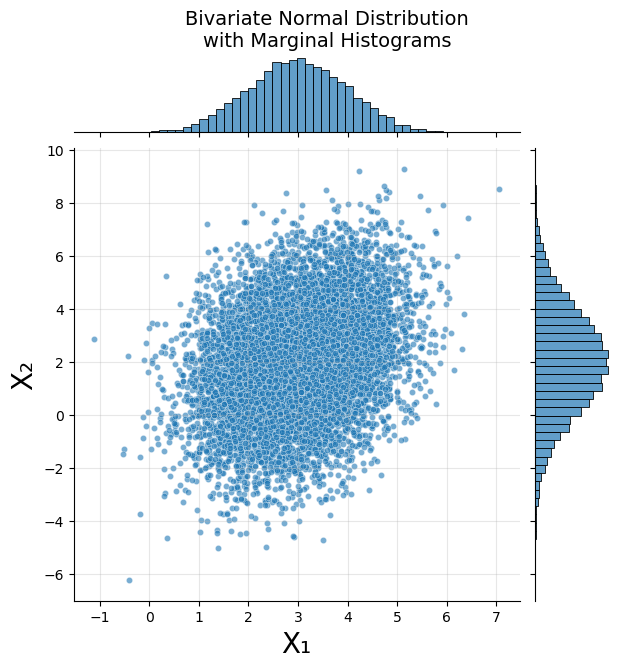

In [22]:
# Create the joint plot with marginal histograms
g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], 
                  kind='scatter',
                  alpha=0.6,
                  s=20,
                  marginal_kws={'bins': 50, 'alpha': 0.7})

# Customize the plot
g.set_axis_labels('X₁', 'X₂', fontsize=20)
g.fig.suptitle('Bivariate Normal Distribution\nwith Marginal Histograms', 
               fontsize=14, y=1.05)

# Add grid to main plot
g.ax_joint.grid(True, alpha=0.3)

**Empirical Covariance Matrix**
The empirical covariance matrix, i.e. the covariance matrix calculated from the samples, is computed as follows.

Given a dataset with $n$ samples and $p$ variables, where each sample is represented as $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^T$, the empirical covariance matrix $\mathbf{S}$ is

\begin{equation}
\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{x}_i - \overline{\mathbf{x}})(\mathbf{x}_i - \overline{\mathbf{x}})^T
\end{equation}

where $\overline{\mathbf{x}} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$ is the sample mean vector.

For our bivariate case ($p = 2$), the empirical covariance is

\begin{equation}
\begin{split}
\mathbf{S} & = \frac{1}{n-1} \sum_{i=1}^{n} \begin{bmatrix} x_{i1} - \overline{x}_1 \\ x_{i2} - \overline{x}_2 \end{bmatrix} \begin{bmatrix} x_{i1} - \overline{x}_1 & x_{i2} - \overline{x}_2 \end{bmatrix} \\
& = \begin{bmatrix} s_{11} & s_{12} \\ s_{21} & s_{22} \end{bmatrix}
\end{split}
\end{equation}
where:
- $s_{11} = \frac{1}{n-1} \sum_{i=1}^{n} (x_{i1} - \overline{x}_1)^2$ is the sample variance of the first variable
- $s_{22} = \frac{1}{n-1} \sum_{i=1}^{n} (x_{i2} - \overline{x}_2)^2$ is the sample variance of the second variable  
- $s_{12} = s_{21} = \frac{1}{n-1} \sum_{i=1}^{n} (x_{i1} - \overline{x}_1)(x_{i2} - \overline{x}_2)$ is the sample covariance

Note that we divide by $(n-1)$ rather than $n$ to obtain an unbiased estimator of the population covariance matrix. This is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

As the number of samples $n$ increases, the empirical covariance matrix $\mathbf{S}$ converges to the true population covariance matrix $\boldsymbol{\Sigma}$.

This can be comptued in a number of ways. NumPy as built in functionality to compute the covariance matrix, through np.cov( ). Here is an example code.
```python
Cov = np.cov(samples.T)
```
You can direclty compute the empirical covariance by 
```python
X_bar  = np.mean(samples, axis =0) 
X = samples - X_bar 
Cov = X.T@X/(n_samples -1)
```

**Exercise**
Using pencil and paper show that the above Python code does match the derivation above for the $p=2$, the bivariate case. 

```{admonition} Solution
:class: dropdown
:name: covariance-derivation
For the bivariate case ($p=2$), let's show that `X.T @ X / (n_samples - 1)` equals the empirical covariance matrix formula.
Given our centered data matrix:
\begin{equation}
\mathbf{X} = \begin{bmatrix} 
x_{11} - \overline{x}_1 & x_{12} - \overline{x}_2 \\
x_{21} - \overline{x}_1 & x_{22} - \overline{x}_2 \\
\vdots & \vdots \\
x_{n1} - \overline{x}_1 & x_{n2} - \overline{x}_2
\end{bmatrix}
\end{equation}
The matrix multiplication $\mathbf{X}^T \mathbf{X}$ gives us:
\begin{equation}
\mathbf{X}^T \mathbf{X} = \begin{bmatrix} 
x_{11} - \overline{x}_1 & x_{21} - \overline{x}_1 & \cdots & x_{n1} - \overline{x}_1 \\
x_{12} - \overline{x}_2 & x_{22} - \overline{x}_2 & \cdots & x_{n2} - \overline{x}_2
\end{bmatrix}
\begin{bmatrix} 
x_{11} - \overline{x}_1 & x_{12} - \overline{x}_2 \\
x_{21} - \overline{x}_1 & x_{22} - \overline{x}_2 \\
\vdots & \vdots \\
x_{n1} - \overline{x}_1 & x_{n2} - \overline{x}_2
\end{bmatrix}
\end{equation}
This results in a $2 \times 2$ matrix:
\begin{equation}
\mathbf{X}^T \mathbf{X} = \begin{bmatrix}
\sum_{i=1}^{n} (x_{i1} - \overline{x}_1)^2 & \sum_{i=1}^{n} (x_{i1} - \overline{x}_1)(x_{i2} - \overline{x}_2) \\
\sum_{i=1}^{n} (x_{i1} - \overline{x}_1)(x_{i2} - \overline{x}_2) & \sum_{i=1}^{n} (x_{i2} - \overline{x}_2)^2
\end{bmatrix}
\end{equation}
Dividing by $(n-1)$:
\begin{equation}
\frac{\mathbf{X}^T \mathbf{X}}{n-1} = \begin{bmatrix}
\frac{1}{n-1}\sum_{i=1}^{n} (x_{i1} - \overline{x}_1)^2 & \frac{1}{n-1}\sum_{i=1}^{n} (x_{i1} - \overline{x}_1)(x_{i2} - \overline{x}_2) \\
\frac{1}{n-1}\sum_{i=1}^{n} (x_{i1} - \overline{x}_1)(x_{i2} - \overline{x}_2) & \frac{1}{n-1}\sum_{i=1}^{n} (x_{i2} - \overline{x}_2)^2
\end{bmatrix}
\end{equation}
\begin{equation}
= \begin{bmatrix} s_{11} & s_{12} \\ s_{21} & s_{22} \end{bmatrix} = \mathbf{S}
\end{equation}
This exactly matches our empirical covariance matrix formula where:
- $s_{11}$ is the sample variance of variable 1
- $s_{22}$ is the sample variance of variable 2  
- $s_{12} = s_{21}$ is the sample covariance between variables 1 and 2
Therefore, the Python code `X.T @ X / (n_samples - 1)` correctly implements the empirical covariance matrix calculation.
```

Here is code to compute the empirical covariance. It is compared to the covariance; note the similarity.

In [23]:
# create mean from samples 
X_bar  = np.mean(samples, axis =0) 
# subtract mean. 
X = samples - X_bar 
# compute covariance 
Cov = X.T@X/(n_samples -1)
Cov

array([[1.00302237, 0.58639293],
       [0.58639293, 4.00700898]])

In [24]:
print("Compare to Sigma")
print(Cov)
print(Sigma) 

Compare to Sigma
[[1.00302237 0.58639293]
 [0.58639293 4.00700898]]
[[1.  0.6]
 [0.6 4. ]]


You can also compute the covariance matrix through NumPy, np.cov( ).

In [25]:
np.cov(samples.T)

array([[1.00302237, 0.58639293],
       [0.58639293, 4.00700898]])

With the empirical covariance matrix in hand, we can compute the eigenvalues and eigenvectors. The eigenvectors denote the directions in which the data varies the most. These directions are added to the scatter plot from before.

Text(0.5, 1.05, 'Bivariate Normal with Principal Component Directions')

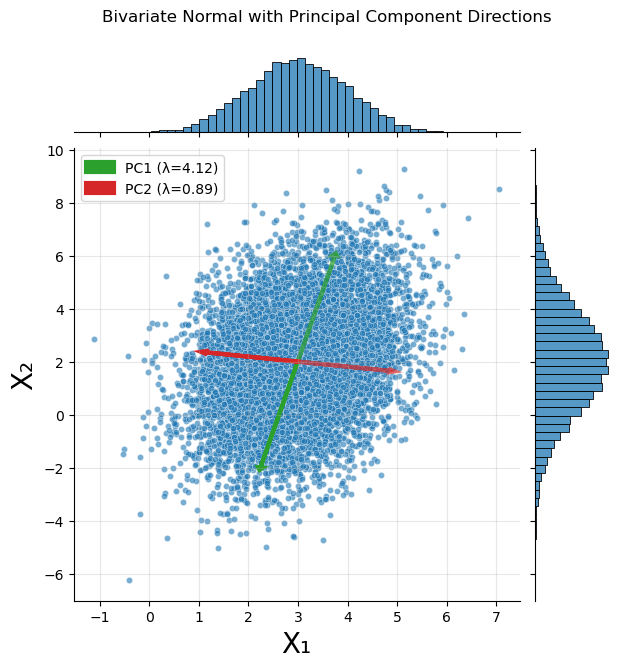

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(Cov)

# Sort by eigenvalue (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Create joint plot
g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], 
                  kind='scatter', alpha=0.6, s=20,
                  marginal_kws={'bins': 50})

# Add eigenvectors as arrows from the sample mean
sample_mean = np.mean(samples, axis=0)

for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    # Scale arrow length by square root of eigenvalue (proportional to std dev)
    length = 2 * np.sqrt(eigenval)
    
    # Draw arrow
    g.ax_joint.arrow(sample_mean[0], sample_mean[1], 
                     length * eigenvec[0], length * eigenvec[1],
                     head_width=0.1, head_length=0.1, 
                     fc=f'C{i+2}', ec=f'C{i+2}', linewidth=3,
                     label=f'PC{i+1} (λ={eigenval:.2f})')
    
    # Draw arrow in opposite direction too
    g.ax_joint.arrow(sample_mean[0], sample_mean[1], 
                     -length * eigenvec[0], -length * eigenvec[1],
                     head_width=0.1, head_length=0.1, 
                     fc=f'C{i+2}', ec=f'C{i+2}', linewidth=3, alpha=0.7)

# Add legend and labels
g.ax_joint.legend()
g.ax_joint.grid(True, alpha=0.3)
g.set_axis_labels('X₁', 'X₂', size=20)
g.fig.suptitle('Bivariate Normal with Principal Component Directions', y=1.05)



The explained variance ratio measures how much each principal component contributes to the total variance. The explained variance ratio of a principal component is:
\begin{equation}
\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}.
\end{equation}

In [27]:
print("Explained Variance Ratio")
print("Component 1:", eigenvalues[0]/np.sum(eigenvalues))
print("Component 2:", eigenvalues[1]/np.sum(eigenvalues))

Explained Variance Ratio
Component 1: 0.8218347335197506
Component 2: 0.17816526648024952


**Compare to Sklearn**
We should compare our results to sklearn. Below is the Sklearn code. 

In [28]:
from sklearn.decomposition import PCA


# Create PCA object
pca = PCA(n_components=2)  # Keep both components for bivariate data

# Fit PCA and transform the data
samples_pca = pca.fit_transform(samples)

# Get the results
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_.T  # Note: sklearn stores as rows, so transpose
explained_variance_ratio = pca.explained_variance_ratio_
mean_sklearn = pca.mean_

# Print results
print("Sklearn Results:")
print(f"Eigenvalues: {eigenvalues_sklearn}")
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Eigenvectors (columns):\n{eigenvectors_sklearn}")
print(f"Sample mean: {mean_sklearn}")

# Compare with NumPy calculation
print("\nComparison:")
print(f"NumPy eigenvalues: {eigenvalues}")
print(f"Sklearn eigenvalues: {eigenvalues_sklearn}")
print(f"Difference: {np.abs(eigenvalues - eigenvalues_sklearn)}")

Sklearn Results:
Eigenvalues: [4.11741778 0.89261357]
Explained variance ratio: [0.82183473 0.17816527]
Eigenvectors (columns):
[[ 0.18503342  0.98273223]
 [ 0.98273223 -0.18503342]]
Sample mean: [2.99456309 2.01817911]

Comparison:
NumPy eigenvalues: [4.11741778 0.89261357]
Sklearn eigenvalues: [4.11741778 0.89261357]
Difference: [1.77635684e-15 3.03090886e-14]


## Eigenvalues and Eigenvectors from Covariance Matrix Components

We can show how the eigenvalues are related to the components of our covariance matrix parameterized by $\sigma_x$, $\sigma_y$, and $\rho$.

Our covariance matrix is
\begin{equation}
\boldsymbol{\Sigma} = \begin{bmatrix} \sigma_x^2 & \rho\sigma_x\sigma_y \\ \rho\sigma_x\sigma_y & \sigma_y^2 \end{bmatrix}.
\end{equation}

To find the eigenvalues, we solve the characteristic equation
\begin{equation}
|\boldsymbol{\Sigma} - \lambda\mathbf{I}| = 0.
\end{equation}

This gives us
\begin{equation}
\begin{vmatrix} \sigma_x^2 - \lambda & \rho\sigma_x\sigma_y \\ \rho\sigma_x\sigma_y & \sigma_y^2 - \lambda \end{vmatrix} = 0.
\end{equation}

Expanding the determinant gives
\begin{equation}
\begin{split}
(\sigma_x^2 - \lambda)(\sigma_y^2 - \lambda) - (\rho\sigma_x\sigma_y)^2 &= 0 \\
\sigma_x^2\sigma_y^2 - \lambda(\sigma_x^2 + \sigma_y^2) + \lambda^2 - \rho^2\sigma_x^2\sigma_y^2 &= 0.
\end{split}
\end{equation}

Rearranging into quadratic form gives
\begin{equation}
\lambda^2 - (\sigma_x^2 + \sigma_y^2)\lambda + \sigma_x^2\sigma_y^2(1 - \rho^2) = 0, 
\end{equation}

which can be solved using the quadratic formula with $a = 1$, $b = -(\sigma_x^2 + \sigma_y^2)$, and $c = \sigma_x^2\sigma_y^2(1 - \rho^2)$, giving
\begin{equation}
\lambda = \frac{(\sigma_x^2 + \sigma_y^2) \pm \sqrt{(\sigma_x^2 + \sigma_y^2)^2 - 4\sigma_x^2\sigma_y^2(1 - \rho^2)}}{2}.
\end{equation}

Simplifying the discriminant gives
\begin{equation}
(\sigma_x^2 + \sigma_y^2)^2 - 4\sigma_x^2\sigma_y^2(1 - \rho^2) = (\sigma_x^2 - \sigma_y^2)^2 + 4\rho^2\sigma_x^2\sigma_y^2.
\end{equation}

Therefore, the eigenvalues are
\begin{equation}
\lambda_{1,2} = \frac{(\sigma_x^2 + \sigma_y^2) \pm \sqrt{(\sigma_x^2 - \sigma_y^2)^2 + 4\rho^2\sigma_x^2\sigma_y^2}}{2}.
\end{equation}

**Finding the Eigenvectors**

To find the eigenvectors, we solve $(\boldsymbol{\Sigma} - \lambda_j\mathbf{I})\mathbf{e}_j = \mathbf{0}$ for each eigenvalue, $\mathbf{e}_j$. In our example, $j=1,2$, i.e., we have two eigenvectors. 

For eigenvalue $\lambda_j$, this gives us the matrix equation
\begin{equation}
\begin{bmatrix} \sigma_x^2 - \lambda_j & \rho\sigma_x\sigma_y \\ \rho\sigma_x\sigma_y & \sigma_y^2 - \lambda_j \end{bmatrix} \begin{bmatrix} e_{j1} \\ e_{j2} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
\end{equation}

This yields the equations
\begin{equation}
\begin{split}
(\sigma_x^2 - \lambda_j)e_{j1} + \rho\sigma_x\sigma_y \cdot e_{j2} &= 0 \\
\rho\sigma_x\sigma_y \cdot e_{j1} + (\sigma_y^2 - \lambda_j)e_{j2} &= 0.
\end{split}
\end{equation}

From the first equation
\begin{equation}
e_{j2} = -\frac{(\sigma_x^2 - \lambda_j)}{\rho\sigma_x\sigma_y} e_{j1}.
\end{equation}

To normalize the eigenvector we require $\mathbf{e}_j^T\mathbf{e}_j = 1$, which gives
\begin{equation}
e_{j1}^2 + e_{j2}^2 = 1.
\end{equation}

Substituting the expression for $e_{j2}$ gives
\begin{equation}
\begin{split}
e_{j1}^2 + \left(\frac{\sigma_x^2 - \lambda_j}{\rho\sigma_x\sigma_y}\right)^2 e_{j1}^2 &= 1 \\
e_{j1}^2 \left[1 + \left(\frac{\sigma_x^2 - \lambda_j}{\rho\sigma_x\sigma_y}\right)^2\right] &= 1.
\end{split}
\end{equation}

Therefore
\begin{equation}
e_{j1} = \pm \frac{1}{\sqrt{1 + \left(\frac{\sigma_x^2 - \lambda_j}{\rho\sigma_x\sigma_y}\right)^2}}, 
\end{equation}

and
\begin{equation}
e_{j2} = \mp \frac{(\sigma_x^2 - \lambda_j)}{\rho\sigma_x\sigma_y} \cdot \frac{1}{\sqrt{1 + \left(\frac{\sigma_x^2 - \lambda_j}{\rho\sigma_x\sigma_y}\right)^2}}.
\end{equation}

**Our Specific Example**

For our specific example with $\sigma_x = 1$, $\sigma_y = 2$, and $\rho = 0.3$ we have:
- $\sigma_x^2 = 1$
- $\sigma_y^2 = 4$ 
- $\sigma_x^2 + \sigma_y^2 = 5$
- $(\sigma_x^2 - \sigma_y^2)^2 = (1-4)^2 = 9$
- $4\rho^2\sigma_x^2\sigma_y^2 = 4(0.3)^2(1)(4) = 1.44$

So the eigenvalues are
\begin{equation}
\lambda_{1,2} = \frac{5 \pm \sqrt{9 + 1.44}}{2} = \frac{5 \pm \sqrt{10.44}}{2} = \frac{5 \pm 3.231}{2}, 
\end{equation}

which gives
- $\lambda_1 = \frac{5 + 3.231}{2} = 4.116$
- $\lambda_2 = \frac{5 - 3.231}{2} = 0.884$

These results are similar to our empirical results. We now compute the eigenvectors.

For $\lambda_1 = 4.116$ we have
\begin{equation}
\frac{\sigma_x^2 - \lambda_1}{\rho\sigma_x\sigma_y} = \frac{1 - 4.116}{0.3 \times 1 \times 2} = \frac{-3.116}{0.6} = -5.193
\end{equation}

\begin{equation}
e_{11} = \frac{1}{\sqrt{1 + (-5.193)^2}} = \frac{1}{\sqrt{1 + 26.97}} = \frac{1}{\sqrt{27.97}} = 0.189
\end{equation}

\begin{equation}
e_{12} = -\frac{(-3.116)}{0.6} \times 0.189 = 5.193 \times 0.189 = 0.982
\end{equation}

So $\mathbf{e}_1 = \begin{bmatrix} 0.189 \\ 0.982 \end{bmatrix}$

For $\lambda_2 = 0.884$ we have
\begin{equation}
\frac{\sigma_x^2 - \lambda_2}{\rho\sigma_x\sigma_y} = \frac{1 - 0.884}{0.3 \times 1 \times 2} = \frac{0.116}{0.6} = 0.193
\end{equation}

\begin{equation}
e_{21} = \frac{1}{\sqrt{1 + (0.193)^2}} = \frac{1}{\sqrt{1.037}} = 0.982
\end{equation}

\begin{equation}
e_{22} = -\frac{0.116}{0.6} \times 0.982 = -0.193 \times 0.982 = -0.189
\end{equation}

So $\mathbf{e}_2 = \begin{bmatrix} 0.982 \\ -0.189 \end{bmatrix}$

**Note:** Our eigenvector results are similar to our empirical results, up to a sign difference. This is normal, as eigenvectors are defined up to scalar multiplication. In our case, since we normalized to unit length, the eigenvectors are defined up to a sign.

### Appendix: Correlation Plots 
To illustrate the functionality of the correlation coefficient, I will plot a series of bivariate normal distributions for $\rho = [-1, -0.5, 0, 0.5, 1]$. For each case the standard deviations are $\sigma_x = \sigma_y = 1$, with mean $(0, 0)$.

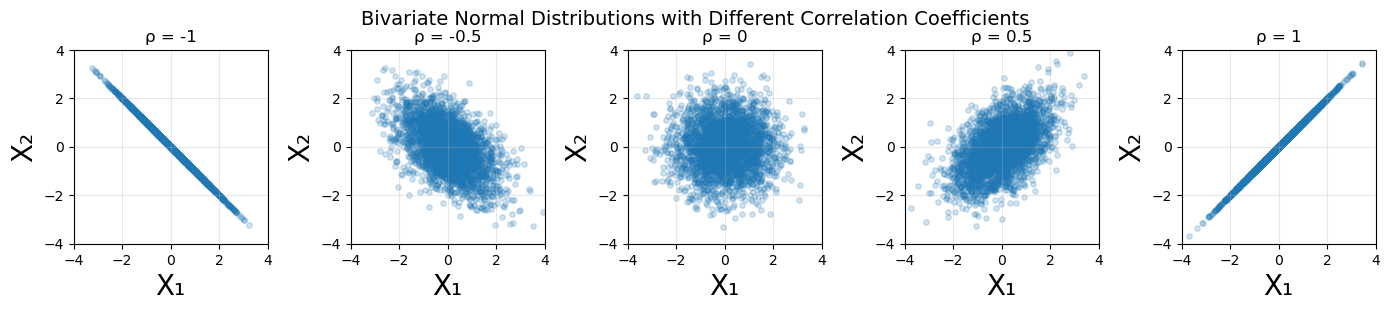

In [29]:

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 3000
mu = [0, 0]
sigma_x = sigma_y = 1
rho_values = [-1, -0.5, 0, 0.5, 1]

# Create figure with 5 subplots
fig = plt.figure(figsize=(14, 6))

for i, rho in enumerate(rho_values):
    # Construct covariance matrix
    Sigma = np.array([[sigma_x**2, rho * sigma_x * sigma_y],
                      [rho * sigma_x * sigma_y, sigma_y**2]])
    
    # Generate samples
    samples = mvn(mean=mu, cov=Sigma, size=n_samples)
    
    # Create subplot
    ax = fig.add_subplot(1, 5, i+1)
    ax.scatter(samples[:, 0], samples[:, 1], alpha=0.2, s=15)
    
    # Set labels and title
    ax.set_xlabel('X₁', size=20)
    ax.set_ylabel('X₂', size=20)
    ax.set_title(f'ρ = {rho}')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Set consistent axis limits for comparison
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

plt.suptitle('Bivariate Normal Distributions with Different Correlation Coefficients', 
             fontsize=14, y=.7)
plt.tight_layout()
